In [2]:
import pandas as pd

#Loading the dataset
data= pd.read_csv("/content/TSLA.csv")
data.head(10)


,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999
5,2019-10-07,47.712002,45.709999,45.959999,47.543999,40321000.0,47.543999
6,2019-10-08,48.787998,46.900002,47.174000,48.009998,43391000.0,48.009998
7,2019-10-09,49.459999,48.130001,48.264000,48.905998,34472000.0,48.905998
8,2019-10-10,49.855999,48.316002,49.056000,48.948002,31416500.0,48.948002
9,2019-10-11,50.216000,49.362000,49.430000,49.577999,42377000.0,49.577999


In [3]:
data.isnull().sum()  # checking for missing values are 0 or not

,0
Date,0
High,0
Low,0
Open,0
Close,0
Volume,0
Adj Close,0


In [4]:
data.fillna(method='ffill', inplace=True)

/tmp/ipython-input-2866031220.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [5]:
# convert date coloumn to datetime

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


**Plotting the data** **bold text**

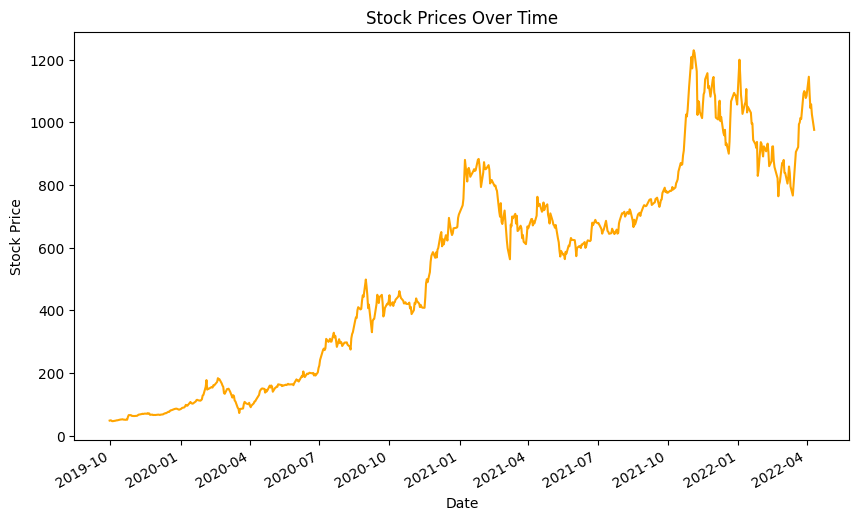

In [6]:
import matplotlib.pyplot as plt

# plotting the stock price

data['Close'].plot(figsize=(10,6), color="orange")
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [7]:
# defining the spiliting ratio

train_size= int(len(data)*0.8)
train = data[:train_size]
test = data[train_size:]

#checking the split

print(f'train size: {len(train)}')
print(f'test size: {len(test)}')

train size: 511
test size: 128


**Implementing the model  (ARIMA) => AutoRegressive Integrated Moving Average**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [9]:
# Fit the ARIMA model ()
model = ARIMA(train['Close'], order=(5,1,4))
model_fit = model.fit()

print(model_fit.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  511
Model:                 ARIMA(5, 1, 4)   Log Likelihood               -2184.417
Date:                Sat, 04 Oct 2025   AIC                           4388.835
Time:                        13:54:13   BIC                           4431.179
Sample:                             0   HQIC                          4405.436
                                - 511                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2147      0.146     -1.473      0.141      -0.500       0.071
ar.L2          0.1671      0.113      1.479      0.139      -0.054       0.389
ar.L3         -0.3882      0.119     -3.273      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


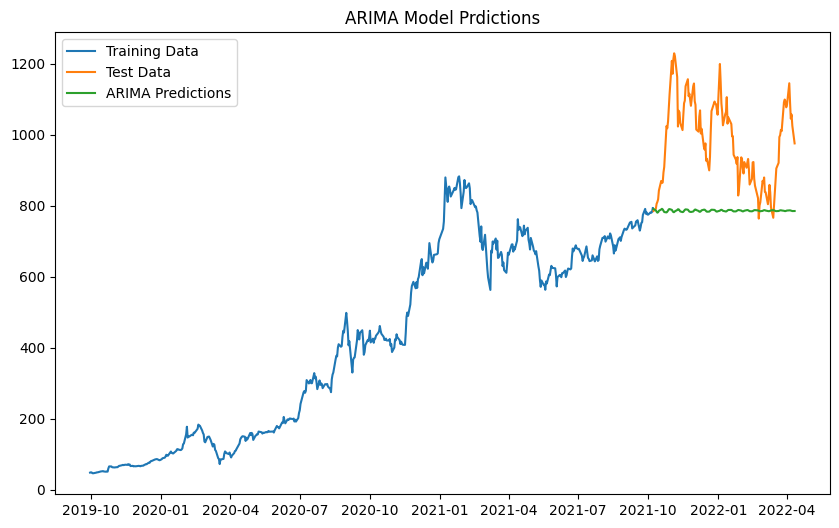

RMSE for ARIMA: 228.53452263052105


In [10]:
forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(10,6))
plt.plot(train.index, train['Close'], label="Training Data")
plt.plot(test.index, test['Close'], label = 'Test Data ')
plt.plot(test.index,forecast, label = 'ARIMA Predictions')
plt.title('ARIMA Model Prdictions')
plt.legend()
plt.show()


# Evaluate the model
rmse_arima = np.sqrt(mean_squared_error(test['Close'], forecast))
print(f'RMSE for ARIMA: {rmse_arima}')

**LSTM model (Deep Learning)**

In [11]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train[['Close']])
test_scaled = scaler.transform(test[['Close']])

  Preparing data for LSTM   

In [13]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Number of days to look back
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape input to be 3D [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



Build and Training the LSTM

In [14]:
scaler_x = MinMaxScaler()
n_samples, timesteps, n_feats = X_train.shape
X_train_flat = X_train.reshape(n_samples, timesteps * n_feats)
X_train_scaled = scaler_x.fit_transform(X_train_flat).reshape(n_samples, timesteps, n_feats)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1))


In [15]:
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Model, Sequential

model = Sequential()
model.add(tf.keras.Input(shape=(timesteps, n_feats)))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.25))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae'])

# Callbacks
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.1,
    epochs=20,
    batch_size=32,
    # callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 392ms/step - loss: 0.0850 - mae: 0.2037 - val_loss: 5.7842e-04 - val_mae: 0.0170
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - loss: 0.0127 - mae: 0.0885 - val_loss: 0.0026 - val_mae: 0.0468
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - loss: 0.0074 - mae: 0.0642 - val_loss: 0.0058 - val_mae: 0.0728
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - loss: 0.0074 - mae: 0.0600 - val_loss: 0.0054 - val_mae: 0.0696
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 322ms/step - loss: 0.0054 - mae: 0.0523 - val_loss: 0.0016 - val_mae: 0.0370
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - loss: 0.0042 - mae: 0.0470 - val_loss: 6.0160e-04 - val_mae: 0.0208
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - loss: 0.0043 - mae: 0.0482 - val_loss: 5.0157e-04 - val_mae: 0.0158
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 357ms/step - loss: 0.0049 - mae: 0.0504 - val_loss: 6.1214e-04 - val_mae: 0.0212
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3

In [16]:
X_test_flat = X_test.reshape(X_test.shape[0], timesteps * n_feats)
X_test_scaled = scaler_x.transform(X_test_flat).reshape(X_test.shape[0], timesteps, n_feats)
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 381ms/step


Making Prediction

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


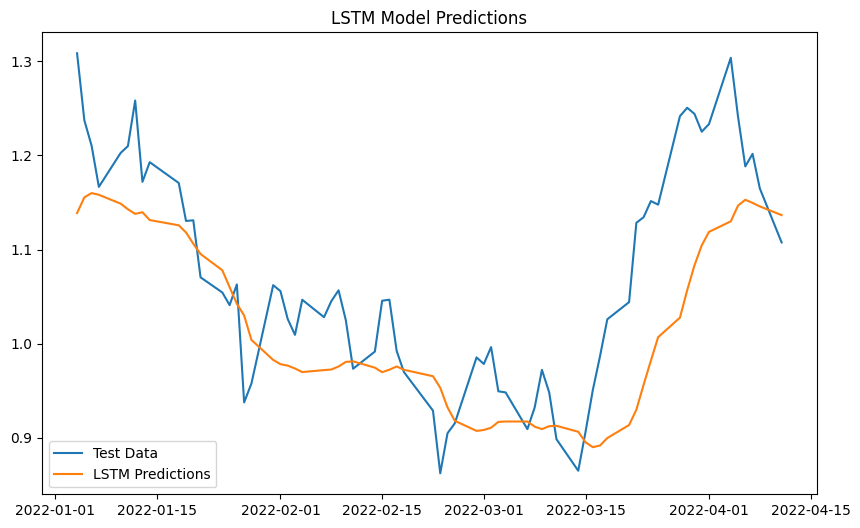

RMSE for LSTM: 0.08717566566429955
Overall Accuracy: 91.85%


In [19]:
# Make predictions
predictions_lstm = model.predict(X_test_scaled)

# Inverse transform to get the actual values
predictions_lstm = scaler_y.inverse_transform(predictions_lstm)
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Plot the predictions vs actual values
plt.figure(figsize=(10,6))
plt.plot(test.index[time_step:], y_test_actual, label='Test Data')
plt.plot(test.index[time_step:], predictions_lstm, label='LSTM Predictions')
plt.title('LSTM Model Predictions')
plt.legend()
plt.show()

# Evaluate the model
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, predictions_lstm))
print(f'RMSE for LSTM: {rmse_lstm}')

accuracy = 100 - (rmse_lstm / np.mean(y_test_actual) * 100)
print("Overall Accuracy: {:.2f}%".format(accuracy))

In [20]:
# Calculate MAPE for ARIMA
mape_arima = np.mean(np.abs((test['Close'] - forecast) / test['Close'])) * 100

# Calculate MAPE for LSTM
mape_lstm = np.mean(np.abs((y_test_actual - predictions_lstm) / y_test_actual)) * 100

# Print the overall accuracy for both models
print(f'MAPE for ARIMA: {mape_arima:.2f}%')
print(f'MAPE for LSTM: {mape_lstm:.2f}%')


MAPE for ARIMA: nan%
MAPE for LSTM: 6.23%


/tmp/ipython-input-3533253230.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape_arima = np.mean(np.abs((test['Close'] - forecast) / test['Close'])) * 100


Tested the values from user input

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Function to make future predictions using LSTM
def predict_future(model, scaler, last_data, days):
    # Prepare the input data for prediction (using last 'time_step' data)
    prediction_input = last_data[-60:]  # Use last 60 days for prediction (adjust this based on your time_step)
    prediction_input = prediction_input.reshape(1, -1, 1)  # Reshape for LSTM input

    # List to hold future predictions
    future_predictions = []

    for _ in range(days):
        next_price = model.predict(prediction_input)  # Predict the next day
        future_predictions.append(next_price[0, 0])

        # Update the input with the new predicted value for the next iteration
        next_price_reshaped = next_price.reshape(1, 1, 1)  # Reshape predicted value to match the input shape
        prediction_input = np.append(prediction_input[:, 1:, :], next_price_reshaped, axis=1)

    # Inverse the scaling to get the actual predicted values
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    return future_predictions

# Function to handle user input and model output
def get_model_output():
    # Get user input for forecast period (number of days)
    forecast_days_input = input("Enter the number of days you want to forecast: ")
    try:
        forecast_days = int(float(forecast_days_input))
    except ValueError:
        print("Invalid input. Please enter an integer.")
        forecast_days = 0 # Set to 0 or handle as appropriate

    if forecast_days > 0:
        # Assume that 'test_scaled' contains the scaled test data from the last 60 days (or train data)
        last_data_point = test_scaled[-60:]  # Use the last 60 days for forecasting

        # Call the function to predict future stock prices
        future_forecast = predict_future(model, scaler, last_data_point, forecast_days)

        # Display the predictions
        print(f"\nForecast for the next {forecast_days} days:")
        for i, prediction in enumerate(future_forecast, 1):
            print(f"Day {i}: {prediction[0]:.2f}")

# Assuming you have your model and scaler already set up, call the function to test it
get_model_output()

Enter the number of days you want to forecast: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

Forecast for the next 7 days:
Day 1: 982.40
Day 2: 969.40
Day 3: 956.01
Day 4: 942.58
Day 5: 929.32
Day 6: 916.41
Day 7: 903.95


Rolling Window Evaluation:

In [22]:
print("Dataset Length: ", len(data))


Dataset Length:  639


In [58]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


In [59]:
# Function to create dataset for LSTM (reshape the data into time_steps)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


In [64]:
# Define the LSTM model
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(60, 1)))  # Input shape = (time_step, features)
model_lstm.add(tf.keras.layers.LSTM(units=50, return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(units=1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
# Function to perform rolling window evaluation
def rolling_window_evaluation(model, scaler, data, window_size, test_size):
    rmse_scores = []  # To store RMSE scores for each iteration
    mape_scores = []  # To store MAPE scores for each iteration

    # Assuming time_step is defined globally or passed as a parameter
    global time_step # Access the time_step defined in a previous cell

    for start in range(0, len(data) - window_size - test_size + 1, test_size):
        # Split the data into training and testing subsets based on the rolling window
        # Access the 'Close' column properly
        train_data = data.iloc[start:start + window_size]['Close']  # Proper indexing with .iloc
        test_data = data.iloc[start + window_size:start + window_size + test_size]['Close']  # Proper indexing with .iloc

        # Check if we have enough data for the current window and time_step
        if len(train_data) < time_step or len(test_data) < time_step:
            print(f"Skipping window starting at index {start} due to insufficient data ({len(train_data)} train, {len(test_data)} test).")
            continue

        # Scale the data
        train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
        test_scaled = scaler.transform(test_data.values.reshape(-1, 1))

        # Prepare the data for the model , reshape for LSTM input
        X_train, y_train = create_dataset(train_scaled, time_step)
        X_test, y_test = create_dataset(test_scaled, time_step)

        # Add checks for empty arrays after creating datasets
        if len(X_train) == 0 or len(X_test) == 0:
            print(f"Skipping window starting at index {start} as create_dataset returned empty arrays.")
            continue

        # Reshape input to be [samples, time steps, features] for LSTM
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

        # Train the model on the training data
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)  # You can adjust epochs or add early stopping

        # Make predictions
        predictions = model.predict(X_test)

        # Inverse scale the predictions and actual values
        predictions = scaler.inverse_transform(predictions)
        y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Calculate RMSE and MAPE
        rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
        mape = mean_absolute_percentage_error(y_test_actual, predictions)

        # Store the scores
        rmse_scores.append(rmse)
        mape_scores.append(mape)
        print(f"Window starting at index {start}: RMSE = {rmse:.2f}, MAPE = {mape:.2f}%")

    # Return the results
    return rmse_scores, mape_scores


In [82]:
# Define your time_step and window/test sizes
time_step = 60
window_size = 120  # Train on 120 data points
test_size = 61     # Test on 61 data points

# Assuming 'data' is a pandas DataFrame with the 'Close' column
# Make sure your dataset is loaded into `data`

# Example: Let's check if 'data' has 'Close' column
print(data.head())  # Check the data for correct 'Close' column

# Now, fit and scale your data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']].values)

# Train your model, assuming model_lstm is defined elsewhere
# Train the model before calling rolling_window_evaluation
model_lstm.fit(X_train, y_train, epochs=5, batch_size=32)

# Perform rolling window evaluation
rmse_scores, mape_scores = rolling_window_evaluation(model_lstm, scaler, data, window_size, test_size)

# Print the results
print(f"RMSE Scores: {rmse_scores}")
print(f"MAPE Scores: {mape_scores}")


                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2019-09-30  48.796001  47.222000  48.599998  48.174000  29399000.0  48.174000
2019-10-01  49.189999  47.826000  48.299999  48.938000  30813000.0  48.938000
2019-10-02  48.930000  47.886002  48.658001  48.625999  28157000.0  48.625999
2019-10-03  46.896000  44.855999  46.372002  46.605999  75422500.0  46.605999
2019-10-04  46.956001  45.613998  46.321999  46.285999  39975000.0  46.285999
Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0022
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0019
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0016
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0014
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0013
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Window starting at index 0: RMSE = 10.93, MAPE = 0.06%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/ste

**Rolling Window Evaluation for ARIMA**

In [83]:
pip install statsmodels


In [84]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler


In [85]:
# Function to perform rolling window evaluation for ARIMA
def rolling_window_evaluation_arima(data, window_size, test_size):
    rmse_scores = []  # To store RMSE scores for each iteration
    mape_scores = []  # To store MAPE scores for each iteration

    # Loop through the dataset with the given window and test sizes
    for start in range(0, len(data) - window_size - test_size + 1, test_size):
        # Split the data into training and testing subsets based on the rolling window
        train_data = data.iloc[start:start + window_size]['Close']
        test_data = data.iloc[start + window_size:start + window_size + test_size]['Close']

        # Fit the ARIMA model on the training data (p=5, d=1, q=0 are typical ARIMA parameters, but you can adjust)
        model = ARIMA(train_data, order=(5,1,0))  # Example ARIMA(p=5, d=1, q=0)
        model_fit = model.fit()

        # Make predictions
        forecast = model_fit.forecast(steps=test_size)

        # Calculate RMSE and MAPE for the predictions
        rmse = np.sqrt(mean_squared_error(test_data, forecast))
        mape = mean_absolute_percentage_error(test_data, forecast)

        # Store the scores
        rmse_scores.append(rmse)
        mape_scores.append(mape)
        print(f"Window starting at index {start}: ARIMA RMSE = {rmse:.2f}, MAPE = {mape:.2f}%")

    # Return the results
    return rmse_scores, mape_scores


In [86]:
# Define the window_size and test_size
window_size = 120  # Train on 120 data points
test_size = 61     # Test on 61 data points

# Assuming 'data' is a pandas DataFrame with the 'Close' column
# Perform rolling window evaluation for ARIMA
rmse_scores_arima, mape_scores_arima = rolling_window_evaluation_arima(data, window_size, test_size)

# Print the results
print(f"ARIMA RMSE Scores: {rmse_scores_arima}")
print(f"ARIMA MAPE Scores: {mape_scores_arima}")


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Window starting at index 0: ARIMA RMSE = 71.76, MAPE = 0.41%
Window starting at index 61: ARIMA RMSE = 141.37, MAPE = 0.34%
Window starting at index 122: ARIMA RMSE = 74.02, MAPE = 0.08%


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

Window starting at index 183: ARIMA RMSE = 180.03, MAPE = 0.20%
Window starting at index 244: ARIMA RMSE = 52.38, MAPE = 0.07%
Window starting at index 305: ARIMA RMSE = 75.75, MAPE = 0.10%
Window starting at index 366: ARIMA RMSE = 248.72, MAPE = 0.18%
Window starting at index 427: ARIMA RMSE = 191.11, MAPE = 0.18%
ARIMA RMSE Scores: [np.float64(71.75863921060451), np.float64(141.3730677918936), np.float64(74.0176968598915), np.float64(180.02716048966866), np.float64(52.381588863772855), np.float64(75.75007242286924), np.float64(248.7162409328113), np.float64(191.11352104817465)]
ARIMA MAPE Scores: [0.40590821854627485, 0.3383721523873764, 0.08420711094244294, 0.19550559595265105, 0.06886824498985898, 0.09642489611460267, 0.1751311103461306, 0.18246682891193583]


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

In [87]:
# Compare LSTM and ARIMA results
print(f"LSTM RMSE Scores: {rmse_scores}")
print(f"LSTM MAPE Scores: {mape_scores}")
print(f"ARIMA RMSE Scores: {rmse_scores_arima}")
print(f"ARIMA MAPE Scores: {mape_scores_arima}")


LSTM RMSE Scores: [np.float64(10.932830810546903), np.float64(127.27529907226562), np.float64(70.304443359375), np.float64(111.35791015625), np.float64(48.32257080078125), np.float64(59.13104248046875), np.float64(161.47503662109375), np.float64(65.99645996093761)]
LSTM MAPE Scores: [0.05511666137162801, 0.30331085399474683, 0.11630566045356328, 0.16668848690717047, 0.07985485831286657, 0.08055012371406424, 0.14201975215965434, 0.08149019022662767]
ARIMA RMSE Scores: [np.float64(71.75863921060451), np.float64(141.3730677918936), np.float64(74.0176968598915), np.float64(180.02716048966866), np.float64(52.381588863772855), np.float64(75.75007242286924), np.float64(248.7162409328113), np.float64(191.11352104817465)]
ARIMA MAPE Scores: [0.40590821854627485, 0.3383721523873764, 0.08420711094244294, 0.19550559595265105, 0.06886824498985898, 0.09642489611460267, 0.1751311103461306, 0.18246682891193583]


Visualizing the both LSTM & ARIMA After window Rolling

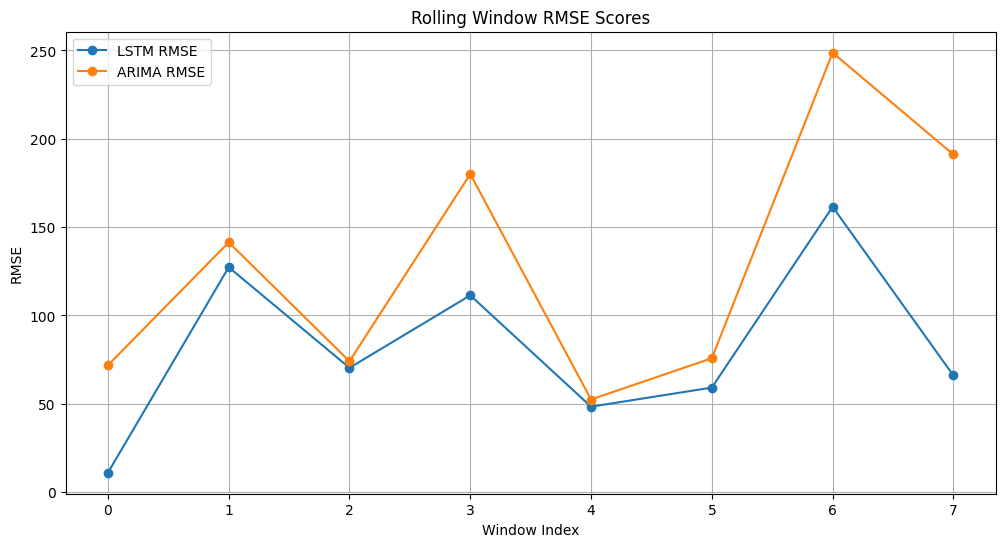

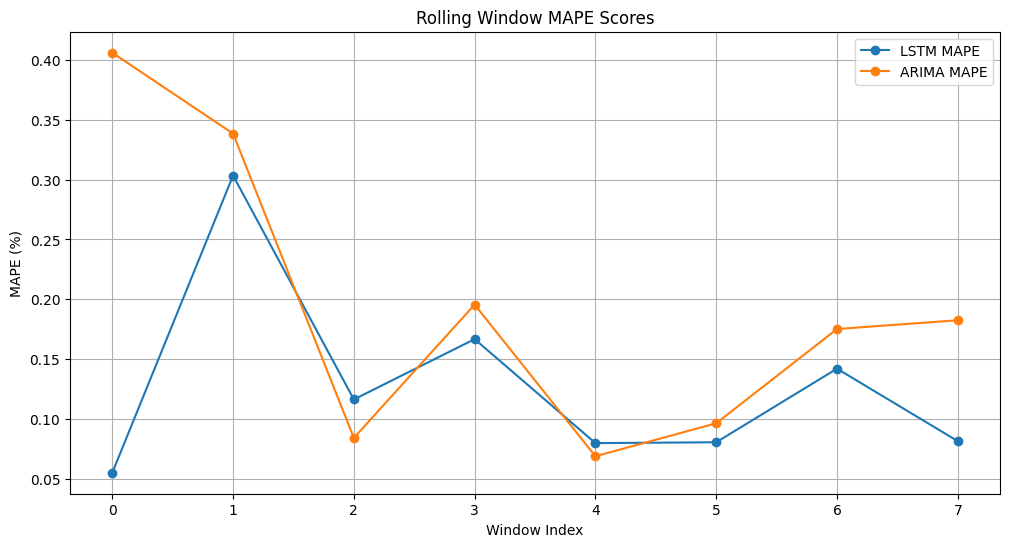

In [88]:
import matplotlib.pyplot as plt

# Assuming rmse_scores, mape_scores, rmse_scores_arima, and mape_scores_arima are available from previous executions

# Plotting RMSE scores
plt.figure(figsize=(12, 6))
plt.plot(rmse_scores, marker='o', label='LSTM RMSE')
plt.plot(rmse_scores_arima, marker='o', label='ARIMA RMSE')
plt.title('Rolling Window RMSE Scores')
plt.xlabel('Window Index')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

# Plotting MAPE scores
plt.figure(figsize=(12, 6))
plt.plot(mape_scores, marker='o', label='LSTM MAPE')
plt.plot(mape_scores_arima, marker='o', label='ARIMA MAPE')
plt.title('Rolling Window MAPE Scores')
plt.xlabel('Window Index')
plt.ylabel('MAPE (%)')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
import pandas as pd

# Assuming rmse_scores, mape_scores, rmse_scores_arima, and mape_scores_arima are available from previous executions

# Create a list of window indices
window_indices = list(range(len(rmse_scores))) # Assuming all score lists have the same length

# Create a dictionary for the LSTM scores
lstm_scores_dict = {
    'Window Index': window_indices,
    'LSTM RMSE': rmse_scores,
    'LSTM MAPE (%)': [mape * 100 for mape in mape_scores] # Convert MAPE to percentage
}

# Create a dictionary for the ARIMA scores
arima_scores_dict = {
    'Window Index': window_indices,
    'ARIMA RMSE': rmse_scores_arima,
    'ARIMA MAPE (%)': [mape * 100 for mape in mape_scores_arima] # Convert MAPE to percentage
}

# Create DataFrames from the dictionaries
lstm_scores_df = pd.DataFrame(lstm_scores_dict)
arima_scores_df = pd.DataFrame(arima_scores_dict)

# Combine the DataFrames for easier comparison
# Assuming the window indices align perfectly between LSTM and ARIMA evaluations
comparison_df = pd.merge(lstm_scores_df, arima_scores_df, on='Window Index')

# Display the comparison table
print("Performance Comparison Table (Rolling Window Evaluation):")
display(comparison_df)

# Optionally, calculate and display average scores
print("\nAverage Performance across Rolling Windows:")
average_rmse_lstm = np.mean(rmse_scores)
average_mape_lstm = np.mean(mape_scores) * 100
average_rmse_arima = np.mean(rmse_scores_arima)
average_mape_arima = np.mean(mape_scores_arima) * 100

average_scores_dict = {
    'Model': ['LSTM', 'ARIMA'],
    'Average RMSE': [average_rmse_lstm, average_rmse_arima],
    'Average MAPE (%)': [average_mape_lstm, average_mape_arima]
}
average_scores_df = pd.DataFrame(average_scores_dict)
display(average_scores_df)

Performance Comparison Table (Rolling Window Evaluation):


,Window Index,LSTM RMSE,LSTM MAPE (%),ARIMA RMSE,ARIMA MAPE (%)
0,0,10.932831,5.511666,71.758639,40.590822
1,1,127.275299,30.331085,141.373068,33.837215
2,2,70.304443,11.630566,74.017697,8.420711
3,3,111.357910,16.668849,180.027160,19.550560
4,4,48.322571,7.985486,52.381589,6.886824
5,5,59.131042,8.055012,75.750072,9.642490
6,6,161.475037,14.201975,248.716241,17.513111
7,7,65.996460,8.149019,191.113521,18.246683



Average Performance across Rolling Windows:


,Model,Average RMSE,Average MAPE (%)
0,LSTM,81.849449,12.816707
1,ARIMA,129.392248,19.336052


In [90]:

print("--- Model Accuracy Comparison ---")
print("\nLSTM Model Accuracy:")
print(f"  Before Rolling Window (Initial Test Set):")
print(f"    RMSE: {rmse_lstm:.2f}")
print(f"    Overall Accuracy: {accuracy:.2f}%")
print(f"  After Rolling Window (Average Performance):")
print(f"    Average RMSE: {average_rmse_lstm:.2f}")
print(f"    Average MAPE: {average_mape_lstm:.2f}%")

print("\nARIMA Model Accuracy:")
print(f"  Before Rolling Window (Initial Test Set):")
print(f"    RMSE: {rmse_arima:.2f}")
print(f"    Initial MAPE: (Calculation in cell AoJTrye84l3e resulted in nan)") # Note the issue with initial MAPE
print(f"  After Rolling Window (Average Performance):")
print(f"    Average RMSE: {average_rmse_arima:.2f}")
print(f"    Average MAPE: {average_mape_arima:.2f}%")

--- Model Accuracy Comparison ---

LSTM Model Accuracy:
  Before Rolling Window (Initial Test Set):
    RMSE: 0.09
    Overall Accuracy: 91.85%
  After Rolling Window (Average Performance):
    Average RMSE: 81.85
    Average MAPE: 12.82%

ARIMA Model Accuracy:
  Before Rolling Window (Initial Test Set):
    RMSE: 228.53
    Initial MAPE: (Calculation in cell AoJTrye84l3e resulted in nan)
  After Rolling Window (Average Performance):
    Average RMSE: 129.39
    Average MAPE: 19.34%
